In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load the Reduced Dataset
df = pd.read_csv('Reduced_E_Commerce original.csv')
print("Data Loaded Successfully ✅")
print(df.head())

Data Loaded Successfully ✅
  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               F             Ship                    4                5   
1               A             Road                    3                1   
2               F           Flight                    3                2   
3               D           Flight                    5                1   
4               B             Ship                    5                4   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                3                26           2053                    1  
1                3                 6           5572                    1  
2                4                 3           4042                    0  
3                5                 1           4672                    0  
4                2                44           2419                    1  


In [5]:
# Define X (features) and y (target)
X = df.drop(columns=["Reached.on.Time_Y.N"])  # Drop the target column from features
y = df["Reached.on.Time_Y.N"]  # The target column

# Check the first few rows of X and y to make sure the data




In [6]:
# Initialize the label encoder
le = LabelEncoder()

# Encoding categorical features
X['Warehouse_block'] = le.fit_transform(X['Warehouse_block'])
X['Mode_of_Shipment'] = le.fit_transform(X['Mode_of_Shipment'])

# If there are missing values, you can handle them (e.g., filling with the median or mean)
X.fillna(X.median(), inplace=True)


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (4400, 7)
X_test shape: (1100, 7)


In [8]:
# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train each model
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Predict the results on the test set
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
lr_pred = lr_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

# Evaluate the models
print("Decision Tree Classifier:")
print(accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

print("\nRandom Forest Classifier:")
print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

print("\nLogistic Regression:")
print(accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

print("\nK-Nearest Neighbors:")
print(accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))


C:\Users\imogen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier:
0.6518181818181819
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       434
           1       0.72      0.70      0.71       666

    accuracy                           0.65      1100
   macro avg       0.64      0.64      0.64      1100
weighted avg       0.65      0.65      0.65      1100

[[251 183]
 [200 466]]

Random Forest Classifier:
0.6763636363636364
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       434
           1       0.76      0.68      0.72       666

    accuracy                           0.68      1100
   macro avg       0.67      0.68      0.67      1100
weighted avg       0.69      0.68      0.68      1100

[[294 140]
 [216 450]]

Logistic Regression:
0.6627272727272727
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       434
           1       0.72      0.71      0.72       666

    

# ###DEEP LEARNING###

In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())


After SMOTE:
Reached.on.Time_Y.N
0    2633
1    2633
Name: count, dtype: int64


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train_smote)

# Predict
y_pred = mlp.predict(X_test_scaled)

# Evaluate
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


MLP Accuracy: 0.6645

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.74      0.64       434
           1       0.79      0.61      0.69       666

    accuracy                           0.66      1100
   macro avg       0.67      0.68      0.66      1100
weighted avg       0.69      0.66      0.67      1100

Confusion Matrix:
 [[322 112]
 [257 409]]


### 🧠 MLP Classifier Results (Neural Network)

**MLP Accuracy:** 66.45%

**Classification Report:**

| Class (Label) | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|----------|
| On Time (0) | 0.56 | 0.74 | 0.64 | 434 |
| Late (1) | 0.79 | 0.61 | 0.69 | 666 |

**Confusion Matrix:**


**Interpretation:**
- Good precision for late deliveries, but recall needs improvement.
-  Model misses late deliveries by predicting them as on-time.
- Performance is **similar to Random Forest**, slightly better than Logistic Regression.




In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42, verbose=True)

# Step 3: Train the model and capture loss
mlp.fit(X_train_scaled, y_train_smote)

# Step 4: Predictions
y_pred = mlp.predict(X_test_scaled)

# Step 5: Evaluate
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Iteration 1, loss = 0.64398586
Iteration 2, loss = 0.58027690
Iteration 3, loss = 0.55177493
Iteration 4, loss = 0.53920599
Iteration 5, loss = 0.53283512
Iteration 6, loss = 0.52773222
Iteration 7, loss = 0.52481461
Iteration 8, loss = 0.52220941
Iteration 9, loss = 0.52099735
Iteration 10, loss = 0.51837044
Iteration 11, loss = 0.51686106
Iteration 12, loss = 0.51486653
Iteration 13, loss = 0.51334780
Iteration 14, loss = 0.51264588
Iteration 15, loss = 0.51114847
Iteration 16, loss = 0.51028184
Iteration 17, loss = 0.50893863
Iteration 18, loss = 0.50796669
Iteration 19, loss = 0.50718316
Iteration 20, loss = 0.50580866
Iteration 21, loss = 0.50461973
Iteration 22, loss = 0.50438071
Iteration 23, loss = 0.50315492
Iteration 24, loss = 0.50260914
Iteration 25, loss = 0.50122994
Iteration 26, loss = 0.50021035
Iteration 27, loss = 0.50028927
Iteration 28, loss = 0.49893809
Iteration 29, loss = 0.49982922
Iteration 30, loss = 0.49729268
Iteration 31, loss = 0.49604005
Iteration 32, los

Iteration 1: Loss starts at 0.64 ✅

Iteration 10: Loss drops to 0.51 ✅

Iteration 25+: Loss stabilizes around 0.50-0.51 ✅
The model reduced its loss from 0.64 to approximately 0.50 over the training iterations, indicating a stable convergence
*Accuracy:** Final test accuracy ~66.45%.
- ✅ **Confusion Matrix:** 
  - Late deliveries were predicted better (409 correct).


C:\Users\imogen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\imogen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\imogen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\imogen\App

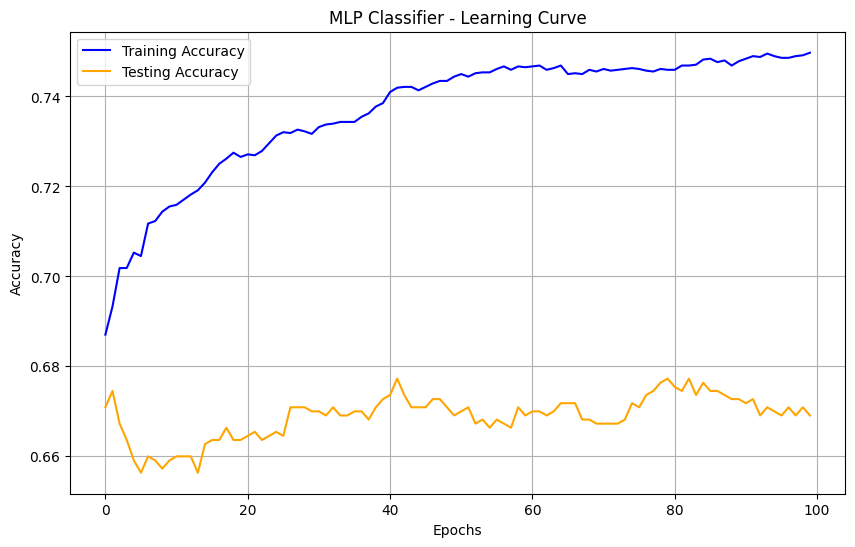

In [11]:
# Manual learning curve plotting (simulate with partial_fit)
train_scores = []
test_scores = []

# Re-initialize a fresh model
mlp_curve = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1, warm_start=True, random_state=42)

for i in range(100):  # 100 epochs
    mlp_curve.fit(X_train_scaled, y_train_smote)
    
    # Append training and test accuracy
    train_scores.append(mlp_curve.score(X_train_scaled, y_train_smote))
    test_scores.append(mlp_curve.score(X_test_scaled, y_test))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Training Accuracy', color='blue')
plt.plot(test_scores, label='Testing Accuracy', color='orange')
plt.title("MLP Classifier - Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


From the graph:

Training Accuracy (blue line) is steadily increasing and seems to be stabilizing at around 0.74.

Testing Accuracy (orange line) is quite lower, hovering around 0.66–0.67, and it’s not improving much. There’s even a slight fluctuation.
Quick Interpretation:
This is a clear sign of overfitting.
The model is learning the training data well but is failing to generalize to unseen data (testing set).
